#  Computer Vision:

Computer vision tasks are carried out by architectures like CNNs and transformers. Workflow for CNN:-

- Input Layer
- Convolution layer
- Hidden activation/ non-linear activation
- Pooling layer
- Output layer/ linear layer
- Output activation

# Different CV libraries in PyTorch

1. `torchvision` - base library for pytorch cv
2. `torchvision.datasets` - get datasets and data loading functions for cv
3. `torchvision.models` - get pretrained cv models
4. `torchvision.transforms` - functions for manipulating vision data
5. `torch.utils.data.Dataset` - Dataset class for pytorch
6. `torch.utils.data.DataLoader` - Creates a python iterable over a dataset

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


## 1. Getting a CV Dataset

FashionMNIST dataset

In [2]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root = "data", # data location
    train=True, # training data
    download=True, # downloading the data
    transform = torchvision.transforms.ToTensor(), # transform the data
    target_transform=None # how do we want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:00<00:00, 74.6MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 4.30MB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 65.1MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.7MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training sample

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [8]:
print(f"Image shape: {image.shape} -> [channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

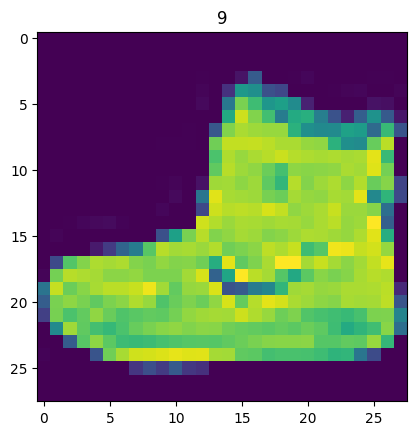

In [9]:
image, label = train_data[0]

print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

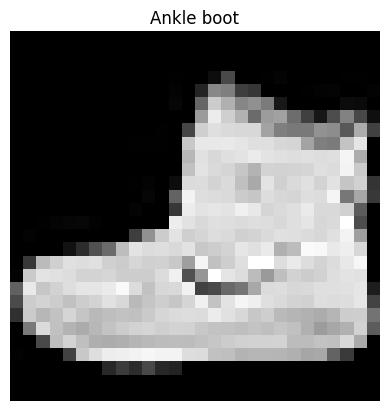

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

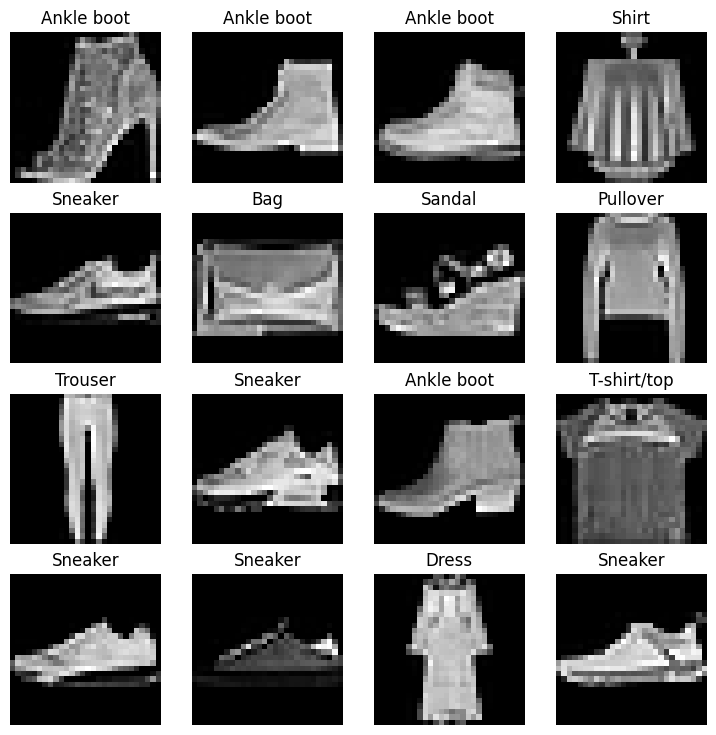

In [11]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)


In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of pytorch Datasets. DataLoader turns our dataset into a python iterable. More specifically we need it in batches or minibatches. Why do we do this?

1. It is more computationally efficient, as your computing hardware may not be able to look(store in memory) at 60000 images in one hit. So we break it down to 32 images at a time.
2. It gives our neural network more chances to update its gradients per epoch.(60000/32)


In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e0678fd8590>,
 <torch.utils.data.dataloader.DataLoader at 0x7e0676edb410>)

In [14]:
print(f"Length of train_dataloader = {len(train_dataloader)} with batch size = {BATCH_SIZE}")
print(f"Length of test_dataloader = {len(test_dataloader)}")

Length of train_dataloader = 1875 with batch size = 32
Length of test_dataloader = 313


In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


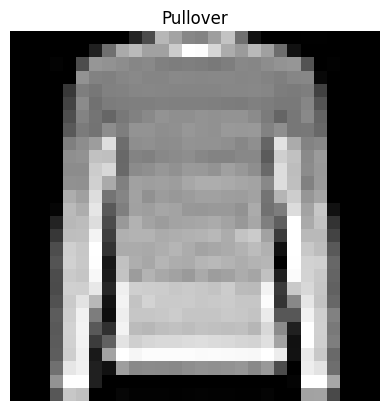

In [16]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Build a baseline model_0

A baseline model is a simple model you will try and improve upon subseuqnet models/experiments

In [17]:
# create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]


flatten_x = flatten_model(x)

print(f"Before flatten shape is {x.shape}")
print(f"After flatten shape is {flatten_x.shape}")

Before flatten shape is torch.Size([1, 28, 28])
After flatten shape is torch.Size([1, 784])


In [18]:
from torch import nn

class FashionMNISTModelV0(nn.Module):

    def __init__(self,
                 input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units,),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Loss function,Optimizer and evaluation metrics for the model

In [21]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("Already exists, skipping download")
else:
    print("Downloading")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

Downloading


In [22]:
from helper_functions import accuracy_fn


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Function to time our experiments

In [23]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device: torch.device=None):
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [24]:
start_time = timer()
end_time = timer()
print_train_time(start_time, end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.3204999997215054e-05

### 3.3 Creating a training loop and test loop on batches of data|

1. Loop through epochs
2. Loop through the training batches, training steps, calc train loss per batch
3. Loop through testing batches, testing steps, calc the test loss per batch
4. Print out what's happening.
5. Time it all(for fun).

In [25]:
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()

epochs=3

for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch}\n-----")
    ### Training
    train_loss = 0
    # loop through training batches
    for batch, (X,y) in enumerate(train_dataloader):

        model_0.train()

        # 1. forward pass
        y_pred = model_0(X)

        # 2. calculate loss
        loss = loss_fn(y_pred,y)
        train_loss+=loss # accumulate training loss

        # 3. Zero the optimizer gradients
        optimizer.zero_grad()

        # 4.  backpropagate the loss
        loss.backward()

        # 5. Step the gradients
        optimizer.step()
        if batch%400==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)}")

    # divide total train loss by the train_dataloader
    train_loss/=len(train_dataloader)

    ### Testing Loss
    test_loss, test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:

            # 1. forward pass
            test_pred = model_0(X_test)

            # 2. calculate loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. calculate accuracy
            test_acc += accuracy_fn(
                y_true=y_test,
                y_pred = test_pred.argmax(dim=1)
            )

        # calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # print out wahts happening
    print(f"\n Train Loss: {train_loss:.4f}| Test loss: {test_loss: .4f}, Test acc: {test_acc:.4f}")

# caluclate traiing time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    train_time_start_on_cpu,
    train_time_end_on_cpu,
    str(next(model_0.parameters()).device)
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

 Train Loss: 0.5904| Test loss:  0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

 Train Loss: 0.4763| Test loss:  0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

 Train Loss: 0.4550| Test loss:  0.4766, Test acc: 83.4265
Train time on cpu: 34.113 seconds


## 4. Make predictions and get Model 0 results

Create a evaluation function

In [26]:
torch.manual_seed(42)

def eval_model(model,
               data_loader,
               loss_fn,
               accuracy_fn):
    loss, acc = 0,0
    model.eval()

    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # make predictions
            y_pred = model(X)

            # accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y,y_pred.argmax(dim=1))

        # scale loss and acc to find the avg loss/acc per batch
        loss/=len(data_loader)
        acc/=len(data_loader)
    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Building model_1 with non-linearity

In [28]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape,
                 hidden_units,
                 output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [32]:
print(f"model_0 is on {next(model_0.parameters()).device}")

model_0 is on cpu


In [34]:
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Build loss function and optimizer

In [35]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


### 6.2 Creating a function for training and testing loops

In [ ]:
def train_step(model,data_loader,loss_fn,
               optimizer,accuracy_fn,device=device):
    train_loss, train_acc = 0,0

    # put the model into training mode
    model.train()
    for batch, (X,y) in enumerate(data_loader):

        # put data on target device
        X,y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. calculate loss and acc
        loss = loss_fn(y_pred, y)
        train_loss +=loss
        train_acc+= accuracy_fn(y, y_pred.argmax(sim=1))

        # 3. zero the optimizer gradients
        optimizer.zero_grad()

        # 4. Loss backwards
        loss.backward

        # 5. Step the optimizer gradients
        optimizer.step()

    # divide total train loss and acc by len(train_dataloader)
    train_loss /= len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

